___

TEXT MINING - LSTM
___
# Text Generation with Neural Networks

## Functions for Processing Text

### Reading in files as a string text

In [78]:
import requests

def read_file(filepath):
    """Reads a file from a local path or a URL and returns its content as a string.

    Args:
        filepath (str): The path to the file or its URL.

    Returns:
        str: The content of the file.
    """
    try:
        # Attempt to open as a local file
        with open(filepath) as f:
            str_text = f.read()
    except FileNotFoundError:
        # If local file not found, try as a URL
        try:
            response = requests.get(filepath)
            response.raise_for_status()  # Raise an exception for bad status codes
            str_text = response.text
        except requests.exceptions.RequestException as e:
            raise SystemExit(f"Error fetching URL: {e}")

    return str_text



In [79]:
# Use the raw GitHub URL
raw_github_url = "https://raw.githubusercontent.com/nluninja/text-mining-dataviz/refs/heads/main/9.%20LSTM/moby_dick_four_chapters.txt"
file_content = read_file(raw_github_url)
print(file_content)



Call me Ishmael.  Some years ago--never mind how long
precisely--having little or no money in my purse, and nothing
particular to interest me on shore, I thought I would sail about a
little and see the watery part of the world.  It is a way I have of
driving off the spleen and regulating the circulation.  Whenever I
find myself growing grim about the mouth; whenever it is a damp,
drizzly November in my soul; whenever I find myself involuntarily
pausing before coffin warehouses, and bringing up the rear of every
funeral I meet; and especially whenever my hypos get such an upper
hand of me, that it requires a strong moral principle to prevent me
from deliberately stepping into the street, and methodically knocking
people's hats off--then, I account it high time to get to sea as soon
as I can.  This is my substitute for pistol and ball.  With a
philosophical flourish Cato throws himself upon his sword; I quietly
take to the ship.  There is nothing surprising in this.  If they but
knew it,

### Tokenize and Clean Text

In [80]:
!python -m spacy download en_core_web_lg

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 587.7/587.7 MB 3.0 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_lg')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [81]:
import spacy
nlp = spacy.load('en_core_web_lg',disable=['parser', 'tagger','ner'])

nlp.max_length = 1198623

/usr/local/lib/python3.10/dist-packages/spacy/util.py:1740: UserWarning: [W111] Jupyter notebook detected: if using `prefer_gpu()` or `require_gpu()`, include it in the same cell right before `spacy.load()` to ensure that the model is loaded on the correct device. More information: http://spacy.io/usage/v3#jupyter-notebook-gpu
  warnings.warn(Warnings.W111)


In [82]:
def separate_punc(doc_text):
    return [token.text.lower() for token in nlp(doc_text) if token.text not in '\n\n \n\n\n!"-#$%&()--.*+,-/:;<=>?@[\\]^_`{|}~\t\n ']

In [83]:
# Use the raw GitHub URL
raw_github_url_2 = "https://raw.githubusercontent.com/nluninja/text-mining-dataviz/refs/heads/main/9.%20LSTM/melville-moby_dick.txt"
file_book = read_file(raw_github_url_2)
tokens = separate_punc(file_book)

/usr/local/lib/python3.10/dist-packages/spacy/pipeline/lemmatizer.py:211: UserWarning: [W108] The rule-based lemmatizer did not find POS annotation for one or more tokens. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
  warnings.warn(Warnings.W108)


In [84]:
tokens

['chapter',
 '1',
 'loomings',
 'call',
 'me',
 'ishmael',
 'some',
 'years',
 'ago',
 'never',
 'mind',
 'how',
 'long',
 'precisely',
 'having',
 'little',
 'or',
 'no',
 'money',
 'in',
 'my',
 'purse',
 'and',
 'nothing',
 'particular',
 'to',
 'interest',
 'me',
 'on',
 'shore',
 'i',
 'thought',
 'i',
 'would',
 'sail',
 'about',
 'a',
 'little',
 'and',
 'see',
 'the',
 'watery',
 'part',
 'of',
 'the',
 'world',
 'it',
 'is',
 'a',
 'way',
 'i',
 'have',
 'of',
 'driving',
 'off',
 'the',
 'spleen',
 'and',
 'regulating',
 'the',
 'circulation',
 'whenever',
 'i',
 'find',
 'myself',
 'growing',
 'grim',
 'about',
 'the',
 'mouth',
 'whenever',
 'it',
 'is',
 'a',
 'damp',
 'drizzly',
 'november',
 'in',
 'my',
 'soul',
 'whenever',
 'i',
 'find',
 'myself',
 'involuntarily',
 'pausing',
 'before',
 'coffin',
 'warehouses',
 'and',
 'bringing',
 'up',
 'the',
 'rear',
 'of',
 'every',
 'funeral',
 'i',
 'meet',
 'and',
 'especially',
 'whenever',
 'my',
 'hypos',
 'get',
 'such

In [85]:
len(tokens)

214708

In [86]:
214708/25

8588.32

## Create Sequences of Tokens

In [87]:
# organize into sequences of tokens
train_len = 25+1 # 25 training words , then one target word

# Empty list of sequences
text_sequences = []

for i in range(train_len, len(tokens)):

    # Grab train_len# amount of characters
    seq = tokens[i-train_len:i]

    # Add to list of sequences
    text_sequences.append(seq)

In [88]:
' '.join(text_sequences[0])

'chapter 1 loomings call me ishmael some years ago never mind how long precisely having little or no money in my purse and nothing particular to'

In [89]:
' '.join(text_sequences[1])

'1 loomings call me ishmael some years ago never mind how long precisely having little or no money in my purse and nothing particular to interest'

In [90]:
' '.join(text_sequences[2])

'loomings call me ishmael some years ago never mind how long precisely having little or no money in my purse and nothing particular to interest me'

In [91]:
len(text_sequences)

214682

# Keras

### Keras Tokenization

In [92]:
from tensorflow.keras.preprocessing.text import Tokenizer

In [93]:
# integer encode sequences of words
tokenizer = Tokenizer()
tokenizer.fit_on_texts(text_sequences)
sequences = tokenizer.texts_to_sequences(text_sequences)

In [94]:
sequences[0]

[158,
 9443,
 17526,
 402,
 42,
 1043,
 43,
 247,
 659,
 140,
 296,
 116,
 82,
 787,
 347,
 113,
 36,
 50,
 1788,
 6,
 49,
 3028,
 3,
 218,
 442,
 5]

In [95]:
tokenizer.index_word

{1: 'the',
 2: 'of',
 3: 'and',
 4: 'a',
 5: 'to',
 6: 'in',
 7: 'that',
 8: 'his',
 9: 'it',
 10: 'i',
 11: 'he',
 12: 'but',
 13: "'s",
 14: 'as',
 15: 'with',
 16: 'is',
 17: 'was',
 18: 'for',
 19: 'all',
 20: 'this',
 21: 'at',
 22: 'not',
 23: 'by',
 24: 'whale',
 25: 'from',
 26: 'so',
 27: 'him',
 28: 'on',
 29: 'be',
 30: 'one',
 31: 'you',
 32: 'there',
 33: 'now',
 34: 'had',
 35: 'have',
 36: 'or',
 37: 'were',
 38: 'they',
 39: 'like',
 40: 'which',
 41: 'then',
 42: 'me',
 43: 'some',
 44: 'their',
 45: 'what',
 46: 'when',
 47: 'an',
 48: 'are',
 49: 'my',
 50: 'no',
 51: 'upon',
 52: 'out',
 53: 'man',
 54: 'into',
 55: 'ship',
 56: 'up',
 57: 'more',
 58: 'ahab',
 59: 'if',
 60: 'them',
 61: 'old',
 62: 'we',
 63: 'sea',
 64: 'would',
 65: "'",
 66: 'ye',
 67: 'do',
 68: 'other',
 69: 'been',
 70: 'over',
 71: 'these',
 72: 'will',
 73: 'though',
 74: 'only',
 75: 'its',
 76: 'down',
 77: 'such',
 78: 'who',
 79: 'yet',
 80: 'head',
 81: 'time',
 82: 'long',
 83: 'boat

In [96]:
for i in sequences[0]:
    print(f'{i} : {tokenizer.index_word[i]}')

158 : chapter
9443 : 1
17526 : loomings
402 : call
42 : me
1043 : ishmael
43 : some
247 : years
659 : ago
140 : never
296 : mind
116 : how
82 : long
787 : precisely
347 : having
113 : little
36 : or
50 : no
1788 : money
6 : in
49 : my
3028 : purse
3 : and
218 : nothing
442 : particular
5 : to


In [97]:
tokenizer.word_counts

OrderedDict([('chapter', 4447),
             ('1', 28),
             ('loomings', 3),
             ('call', 1382),
             ('me', 16095),
             ('ishmael', 500),
             ('some', 15789),
             ('years', 2400),
             ('ago', 815),
             ('never', 5262),
             ('mind', 2039),
             ('how', 6330),
             ('long', 8567),
             ('precisely', 690),
             ('having', 1679),
             ('little', 6412),
             ('or', 17879),
             ('no', 14916),
             ('money', 305),
             ('in', 105799),
             ('my', 15231),
             ('purse', 178),
             ('and', 164029),
             ('nothing', 2936),
             ('particular', 1273),
             ('to', 117832),
             ('interest', 442),
             ('on', 26910),
             ('shore', 572),
             ('i', 53430),
             ('thought', 3874),
             ('would', 11232),
             ('sail', 2522),
             ('about', 

In [98]:
vocabulary_size = len(tokenizer.word_counts)

### Convert to Numpy Matrix

In [99]:
import numpy as np

In [100]:
sequences = np.array(sequences)

In [101]:
sequences

array([[  158,  9443, 17526, ...,   218,   442,     5],
       [ 9443, 17526,   402, ...,   442,     5,  1165],
       [17526,   402,    42, ...,     5,  1165,    42],
       ...,
       [  240,   938,   351, ...,  1419,  1313,    74],
       [  938,   351,  1418, ...,  1313,    74,   219],
       [  351,  1418,     3, ...,    74,   219,   222]])

# Creating an LSTM based model

In [102]:
import keras
from keras.models import Sequential
from keras.layers import Dense,LSTM,Embedding

In [103]:
def create_model(vocabulary_size, seq_len):
    model = Sequential()
    model.add(Embedding(vocabulary_size, 100, input_length=seq_len))
    model.add(LSTM(150,return_sequences=True))
    model.add(LSTM(150))

    model.add(Dense(150, activation='relu'))
    model.add(Dense(vocabulary_size, activation='softmax'))

    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    model.build()
    model.summary()

    return model

### Train / Test Split

In [104]:
from tensorflow.keras.utils import to_categorical

In [105]:
sequences

array([[  158,  9443, 17526, ...,   218,   442,     5],
       [ 9443, 17526,   402, ...,   442,     5,  1165],
       [17526,   402,    42, ...,     5,  1165,    42],
       ...,
       [  240,   938,   351, ...,  1419,  1313,    74],
       [  938,   351,  1418, ...,  1313,    74,   219],
       [  351,  1418,     3, ...,    74,   219,   222]])

In [106]:
# First 25 words
sequences[:,:-1]

array([[  158,  9443, 17526, ...,     3,   218,   442],
       [ 9443, 17526,   402, ...,   218,   442,     5],
       [17526,   402,    42, ...,   442,     5,  1165],
       ...,
       [  240,   938,   351, ...,    84,  1419,  1313],
       [  938,   351,  1418, ...,  1419,  1313,    74],
       [  351,  1418,     3, ...,  1313,    74,   219]])

In [107]:
# last Word
sequences[:,-1]

array([   5, 1165,   42, ...,   74,  219,  222])

In [108]:
X = sequences[:,:-1]

In [109]:
y = sequences[:,-1]

In [110]:
y = to_categorical(y, num_classes=vocabulary_size+1)

In [111]:
seq_len = X.shape[1]

In [112]:
seq_len

25

### Training the Model

In [113]:
# define model
model = create_model(vocabulary_size+1, seq_len)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_3 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_6 (LSTM)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_7 (LSTM)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

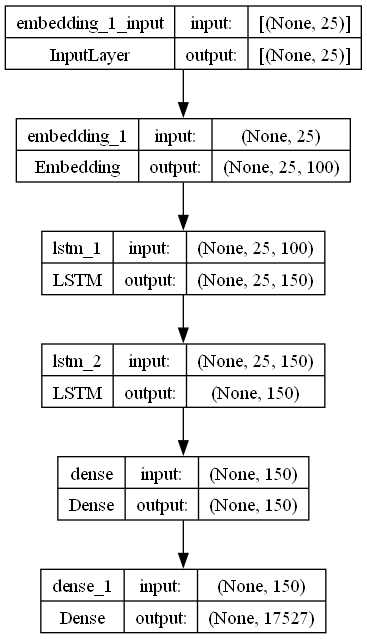

In [114]:
# fit model
model.fit(X, y, batch_size=128, epochs=10,verbose=2) #try with 300 epochs

Epoch 1/10
1678/1678 - 42s - 25ms/step - accuracy: 0.0746 - loss: 6.9158
Epoch 2/10
1678/1678 - 40s - 24ms/step - accuracy: 0.0927 - loss: 6.4415
Epoch 3/10
1678/1678 - 40s - 24ms/step - accuracy: 0.1064 - loss: 6.2144
Epoch 4/10
1678/1678 - 40s - 24ms/step - accuracy: 0.1141 - loss: 6.0429
Epoch 5/10
1678/1678 - 40s - 24ms/step - accuracy: 0.1209 - loss: 5.8841
Epoch 6/10
1678/1678 - 40s - 24ms/step - accuracy: 0.1260 - loss: 5.7320
Epoch 7/10
1678/1678 - 40s - 24ms/step - accuracy: 0.1303 - loss: 5.5901
Epoch 8/10
1678/1678 - 40s - 24ms/step - accuracy: 0.1345 - loss: 5.4571
Epoch 9/10
1678/1678 - 40s - 24ms/step - accuracy: 0.1382 - loss: 5.3296
Epoch 10/10
1678/1678 - 40s - 24ms/step - accuracy: 0.1416 - loss: 5.2018


In [116]:
 model.save('10epoch.keras')

# Generating New Text

In [117]:
from random import randint
from pickle import load
from keras.models import load_model
from keras.preprocessing.sequence import pad_sequences

In [118]:
def generate_text(model, tokenizer, seq_len, seed_text, num_gen_words):
    '''
    INPUTS:
    model : model that was trained on text data
    tokenizer : tokenizer that was fit on text data
    seq_len : length of training sequence
    seed_text : raw string text to serve as the seed
    num_gen_words : number of words to be generated by model
    '''

    # Final Output
    output_text = []

    # Intial Seed Sequence
    input_text = seed_text

    # Create num_gen_words
    for i in range(num_gen_words):

        # Take the input text string and encode it to a sequence
        encoded_text = tokenizer.texts_to_sequences([input_text])[0]

        # Pad sequences to our trained rate (50 words in the video)
        pad_encoded = pad_sequences([encoded_text], maxlen=seq_len, truncating='pre')

        # Predict Class Probabilities for each word -- tensorflow 2.6
        #pred_word_ind = model.predict_classes(pad_encoded, verbose=0)[0]

        pred_word_ind_int = model.predict(pad_encoded, verbose=0)[0]

        pred_word_ind =np.argmax(pred_word_ind_int,axis=0) # break

        # Grab word
        pred_word = tokenizer.index_word[pred_word_ind]

        # Update the sequence of input text (shifting one over with the new word)
        input_text += ' ' + pred_word

        output_text.append(pred_word)

    # Make it look like a sentence.
    return ' '.join(output_text)

### Grab a random seed sequence

In [119]:
text_sequences[0]

['chapter',
 '1',
 'loomings',
 'call',
 'me',
 'ishmael',
 'some',
 'years',
 'ago',
 'never',
 'mind',
 'how',
 'long',
 'precisely',
 'having',
 'little',
 'or',
 'no',
 'money',
 'in',
 'my',
 'purse',
 'and',
 'nothing',
 'particular',
 'to']

In [120]:
import random
random.seed(101)
random_pick = random.randint(0,len(text_sequences))

In [121]:
random_seed_text = text_sequences[random_pick]

In [122]:
random_seed_text

['he',
 'recognised',
 'his',
 'cutting',
 'spade',
 'pole',
 'entangled',
 'in',
 'the',
 'lines',
 'that',
 'were',
 'knotted',
 'round',
 'the',
 'tail',
 'of',
 'one',
 'of',
 'these',
 'whales',
 'there',
 "'s",
 'a',
 'pretty',
 'fellow']

In [123]:
seed_text = ' '.join(random_seed_text)

In [124]:
seed_text

"he recognised his cutting spade pole entangled in the lines that were knotted round the tail of one of these whales there 's a pretty fellow"

In [126]:
import keras
import tensorflow as tf
import requests  # Import the requests library

# Download the model file to a local path using the requests library
model_url = 'https://github.com/nluninja/text-mining-dataviz/raw/refs/heads/main/9.%20LSTM/10epoch.keras'
local_path = 'epochBIG.h5'  # Choose a local file name


In [129]:
# Use requests to download the file content and save it
with requests.get(model_url, stream=True) as response:
    response.raise_for_status()  # Raise an exception for bad responses
    # Write the downloaded content to the local file
    with open(local_path, 'wb') as file:
        for chunk in response.iter_content(chunk_size=8192):
            file.write(chunk)

In [130]:
my_model = keras.models.load_model(local_path)
generate_text(my_model,tokenizer,seq_len,seed_text=seed_text,num_gen_words=50)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


ValueError: Unrecognized keyword arguments passed to LSTM: {'time_major': False}